<a href="https://colab.research.google.com/github/AngXiao01/shared/blob/main/OR_TSP_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the dataset

In [35]:
import random
import math

# Define problem size
num_cities = 10

# Define city information
cities = []
for i in range(num_cities):
    x = round(random.uniform(0, 100),2)  # x-coordinate
    y = round(random.uniform(0, 100),2)  # y-coordinate
    cities.append((x, y))

# Define distance matrix
dist_matrix = []
for i in range(num_cities):
    row = []
    for j in range(num_cities):
        if i == j:
            row.append(0)
        else:
            dist = round(math.sqrt((cities[i][0] - cities[j][0])**2 + (cities[i][1] - cities[j][1])**2),2)
            row.append(dist)
    dist_matrix.append(row)

# Define solution format
distance = 0 # distance of tour
tour = []  # list of visited cities


In [36]:
cities

[(41.43, 56.89),
 (18.92, 77.41),
 (4.78, 83.48),
 (3.23, 68.06),
 (82.81, 56.33),
 (97.11, 72.85),
 (56.32, 75.58),
 (61.38, 26.0),
 (54.43, 13.09),
 (47.17, 80.1)]

In [37]:
dist_matrix

[[0, 30.46, 45.28, 39.8, 41.38, 57.92, 23.9, 36.77, 45.69, 23.91],
 [30.46, 0, 15.39, 18.26, 67.28, 78.32, 37.44, 66.68, 73.47, 28.38],
 [45.28, 15.39, 0, 15.5, 82.62, 92.94, 52.14, 80.67, 86.14, 42.52],
 [39.8, 18.26, 15.5, 0, 80.44, 94.0, 53.62, 71.77, 75.12, 45.56],
 [41.38, 67.28, 82.62, 80.44, 0, 21.85, 32.75, 37.14, 51.72, 42.84],
 [57.92, 78.32, 92.94, 94.0, 21.85, 0, 40.88, 58.92, 73.44, 50.46],
 [23.9, 37.44, 52.14, 53.62, 32.75, 40.88, 0, 49.84, 62.52, 10.21],
 [36.77, 66.68, 80.67, 71.77, 37.14, 58.92, 49.84, 0, 14.66, 55.94],
 [45.69, 73.47, 86.14, 75.12, 51.72, 73.44, 62.52, 14.66, 0, 67.4],
 [23.91, 28.38, 42.52, 45.56, 42.84, 50.46, 10.21, 55.94, 67.4, 0]]

# Dynamic Programming

In [39]:
import math

def tsp(coords, dist_matrix):
    n = len(coords)
    memo = {} # cache for calculated results
    all_points_set = set(range(n)) # set of all cities
    # recursive function
    def helper(curr_point, remaining_points_set, tour):
        # if result is already cached, return it
        if (curr_point, tuple(remaining_points_set)) in memo:
            return memo[(curr_point, tuple(remaining_points_set))]
        # if no other city left, return distance from current city to start
        if not remaining_points_set:
            return dist_matrix[curr_point][0], tour + [0]
        # initialize minimum distance as infinity
        min_distance = math.inf
        # traverse through remaining cities
        for next_point in remaining_points_set:
            # calculate distance from current city to next city
            distance = dist_matrix[curr_point][next_point]
            # recursively calculate shortest distance from next city to start
            remaining_points = remaining_points_set - {next_point}
            distance, new_tour = helper(next_point, remaining_points, tour + [next_point])
            distance += dist_matrix[curr_point][next_point]
            # update minimum distance
            if distance < min_distance:
                min_distance = distance
                best_tour = new_tour
        # cache the result and return
        memo[(curr_point, tuple(remaining_points_set))] = (min_distance, best_tour)
        return min_distance, best_tour
    # call recursive function, starting from the first city
    remaining_points = all_points_set - {0}
    tour = [0]
    distance, tour = helper(0, remaining_points, tour)
    return distance, tour


In [40]:
distance, tour = tsp(cities, dist_matrix)
print("The tour of city is {}".format(tour))
print("The distance of the tous is {:.2f}".format(distance))

The tour of city is [0, 1, 2, 3, 4, 5, 9, 6, 7, 8, 0]
The distance of the tous is 269.50


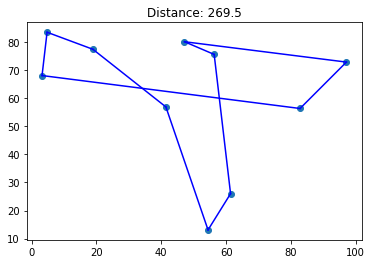

In [41]:
import matplotlib.pyplot as plt

# Plot the cities
x = [city[0] for city in cities]
y = [city[1] for city in cities]
plt.scatter(x, y)

# Plot the tour
for i in range(len(tour)-1):
    city1 = tour[i]
    city2 = tour[i+1]
    plt.plot([cities[city1][0], cities[city2][0]], [cities[city1][1], cities[city2][1]], 'b')

# Plot the edge from last city to first city
city1 = tour[-1]
city2 = tour[0]
plt.plot([cities[city1][0], cities[city2][0]], [cities[city1][1], cities[city2][1]], 'b')

# Add distance to plot
plt.title(f"Distance: {distance}")
plt.show()
